## Activation functions

Neuronal network uses activation functions for the following reasons:

 1. To realize a **non-linear mapping** between the input and output data. Without activation functions a neuronal network would be a linear function and could not learn anything interesting. Think about fitting any dataset with just a straight line.
 
 2. The last activation **transforms the output** so that it is useful for prediction and loss calculation. For example classification problems usually transform the output to be a probability. 

Recall that our MNIST classifier example had the following form:

$$
z = relu(W_1 \cdot x + b_1) \\
y = softmax(W_2 \cdot z + b_2)
$$

This model is using the `relu` and `softmax` activation functions.

Activation functions are always non-linear. 

The only exception is the `linear` activation function that ist just the identity function. This is usually used as last activation in regression problems that have no specific need to transform the output.


### Rectified Linear Unit  (ReLU)

The Rectified Linear Unit is the most commonly used activation function. 

The function returns 0 if it receives any negative input and otherwise just returns the input.

It can be written as:

$$ f(x)=max(0, x) $$

The ReLU functions works well in adding non-linearity and is cheap to calculate.


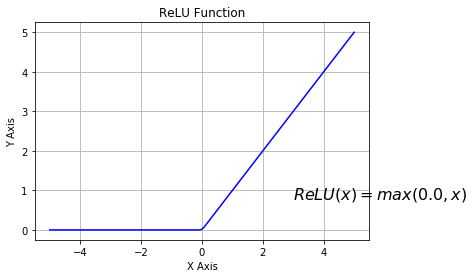

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def ReLU(x):
    return np.maximum(0.0, x)

X = np.linspace(-5, 5, 100)
plt.plot(X, ReLU(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('ReLU Function')
plt.grid()
plt.text(3, 0.8, r'$ReLU(x)=max(0.0, x)$', fontsize=16)
plt.show()

### Sigmoid function

The [Sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) squashes real numbers to range between [0,1].

$$
\sigma(x) = \frac{1}{1+e^{-x}}
$$

It is usually used as the final activation function for binary classification problems.

It takes the unnormalized output of the previous layer and calculates $ P(y=1∣x) $, this is the probability that example $x$ belongs to class 1.


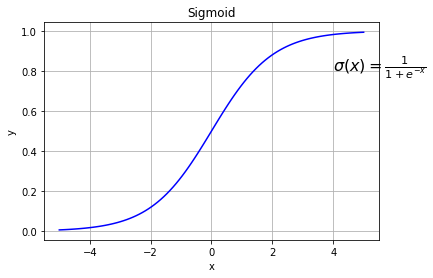

In [5]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def sigma(x):
    return 1 / (1 + np.exp(-x))

X = np.linspace(-5, 5, 100)
plt.plot(X, sigma(X),'b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sigmoid')
plt.grid()
plt.text(4, 0.8, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)
plt.show()

Example application of the sigmoid function:

In [14]:
import numpy as np

def sigma(x):
    return 1 / (1 + np.exp(-x))

# `z` is the output of the last layer
# the model has 6 classes
z = 1.8
print('P(y=0|x) = %f' % (1.0-sigma(z)))
print('P(y=1|x) = %f' % sigma(z))

P(y=0|x) = 0.141851
P(y=1|x) = 0.858149


### Softmax function

The [softmax function](https://en.wikipedia.org/wiki/Softmax_function) is a generalization of the sigmoid function to many values. 

It takes a vector of arbitrary real-valued scores and squashes it to a vector of values between 0 and 1 that sum to 1. 

It is usually used as the final activation function for multi-class classification problems.

Let $ z = [z_1,...,z_k]$ be the output of the previous layer.

$$
softmax(z_i) = \frac{e^{z_i}}{\displaystyle\sum_{i=1}^k e^{z_i}}
$$

The result is a **probability distribution** over k possible outcomes.

When using the softmax function the network outputs are interpreted as the **unnormalized probabilities** for each class.

$$
P(y=i \mid x) = \frac{e^{z_i}}{\displaystyle\sum_{j=1}^k e^{z_j}}
$$

The softmax function first takes the exponent of all your numbers, which gives you unnormalized probabilities. Next they are normalized.

The obvious question is why bother performing doing exponents. 

Why not use $ P(y=i \mid x) = \frac{z_i}{\sum_{j=1}^k z_j} $ instead?

The main reason is because the softmax is normally used together with the cross-entropy loss. 

The log-term in the cross entropy loss cancels out with the exponent, which later makes the gradient calculation easier.

Lets look at an example how the softmax would be used:

In [11]:
import numpy as np

def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

# assume that the model has 6 classes
# `z` is the output of the last layer
z = [1.0, 2.0, 3.0, 4.0, 1.0, 2.0]
probs = softmax(z)
print('Last layer activation:', z)

for i in range(probs.shape[0]):
    print('P(y=%d|x) = %f' % (i, probs[i]))

print('Sum probabilities', probs.sum())    
print('Predicted class:', np.argmax(probs))


Last layer activation: [1.0, 2.0, 3.0, 4.0, 1.0, 2.0]
P(y=0|x) = 0.028644
P(y=1|x) = 0.077863
P(y=2|x) = 0.211653
P(y=3|x) = 0.575333
P(y=4|x) = 0.028644
P(y=5|x) = 0.077863
Sum probabilities 0.9999999999999999
Predicted class: 3
